In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("rainbow")

In [2]:
#εδώ κανω import τις μεθόδους που θα χρειαστώ
from sklearn.impute import SimpleImputer

In [3]:
data_path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = 'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target'.split(',')

heart_disease = pd.read_csv(data_path, names=columns)
print(f'Rows: {heart_disease.shape[0]}\nColumns: {heart_disease.shape[1]}')
print(heart_disease.dtypes)
heart_disease.head()

Rows: 303
Columns: 14
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Exploratory Data Analysis (Graphs)

## Target Column 

In [4]:
print(heart_disease['target'].count())
print(heart_disease['target'].unique()) #δεν έχουμε missing values

303
[0 2 1 3 4]


[0 2 1 3 4]


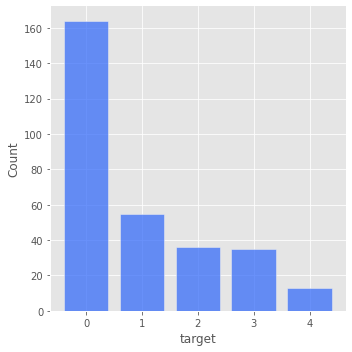

In [5]:
sns.displot(x='target', data=heart_disease, discrete=True, shrink=.8);
print(heart_disease['target'].unique())

#Αρχικά, παρατηρούμε ότι η στήλη target, ή αλλιώς η στήλη που μας λέει εάν το άτομο πάσχει ή όχι απο καρδιασθένεια, έχει 5 διαφορετικές
#τιμές. Αυτό από μ΄όνο του αποτελεί πρόβλημα για το μοντέλο που θέλουμε να φτιάξουμε, δι΄ότι τα δεδομένα που έχουμε δεν επαρκούν για να
#προβλέψουμε 5 διαφορετικές τιμές. Επιπλέον,για να λειτουργήσει σωστά το μοντέλο μας, θα πρέπει κάθε τιμή του target να έχει ίσες
# παρατηρήσεις, δηλαδή η μεταβλη΄τη μας να είναι balanced. Τέλος, το δικό μας ερώτημα έχει μόνο δ΄υο πιθανές απαντήσεις : Πάσχει το άτομο
#από την ασθένεια ή όχι; Λόγω των παραπάνω, θα μετατρέψουμε την μεταβλητή target σε binary μεταβλητή: θα παίρνει δηλαδή μόνο τις τιμές
# 0 = δεν πάσχει και 1 = πάσχει από την ασθένεια.

In [6]:
#heart_disease['target'] = np.where(heart_disease['target']==0,0,1)
heart_disease['target'] = heart_disease['target'].map(lambda x: 0 if x == 0 else 1)

[0 1]


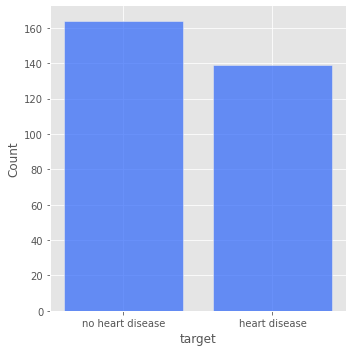

In [7]:
df = heart_disease[['target']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})

sns.displot(x='target', data=df, discrete=True, shrink=.8)
plt.xticks(range(0,2))
print(heart_disease['target'].unique())

#Εδώ, ορίζουμε τις καινούριες τιμές του target ως : 0 = δεν πάσχει και 1 = πάσχει από την ασθένεια. Η μεταβλητή μας είναι πλέον
#ισορροπημένη, και το μοντέλο μας θα μας δίνει για κάθε ασθενή πρόβλεψη 0 ή 1.

## Age Column

Age in years (continuous variable)

In [8]:
print(heart_disease['age'].count())
print(heart_disease['age'].unique()) #δεν έχουμε missing values

303
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]


In [9]:
heart_disease['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

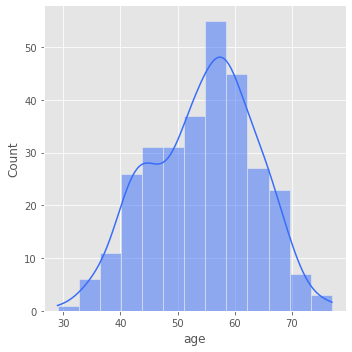

In [10]:
sns.displot(x='age',data=heart_disease,kde=True);
#Μπορούμε να δούμε πως η ηλικία ακολουθεί μία κατανομή αρκετά κοντά στην κανονική. Ας εξε΄τασουμε τώρα πως κατανέμεται η ηλικία σε 
#σχέση με το εάν το άτομο πάσχει από την ασθένεια ή όχι.

<AxesSubplot:xlabel='age', ylabel='Count'>

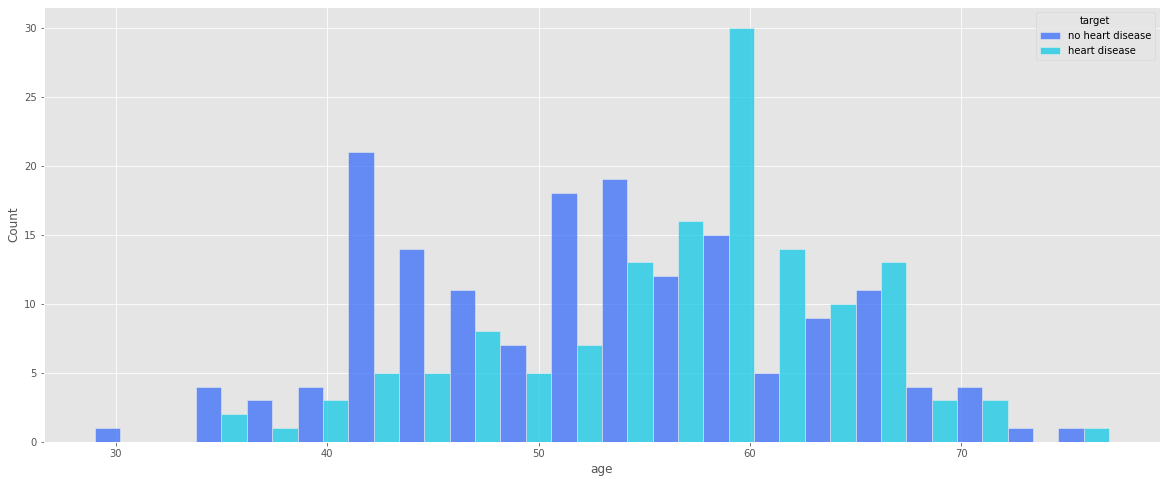

In [12]:
plt.figure(figsize=(20,8))
df = heart_disease[['target','age']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})
sns.histplot(x='age',hue='target',data=df, bins=20, multiple="dodge")

#από το γράφημα αυτό μπορούμε να δούμε πως η ηλικία των ατόμων που έχουν την ασθένεια τείνει να είναι μεγαλύτερη, ενώ τα άτομα 
#μικρότερη ηλικίας έχουν λιγότερες πιθανότητες να είναι ασθενείς. Όπως περιμέναμε λοιπον, η ηλικία είναι παράγοντας που επηρρεάζει την
#μεταβλητή target, και είναι απαραίτητη προκειμένου το μοντέλο μας να δώσει καλύτερες προβλέψεις.

## Sex Column

sex (1 = male; 0 = female) (binary variable)

In [13]:
heart_disease['sex'] = heart_disease['sex'].astype(int)
#Αλλάζουμε το type της μεταβλητής sex από float σε int. Η μεταβλητή sex έιναι binary μεταβλητή, δηλαδή παίρνει μόνο δύο τιμές.

In [14]:
print(heart_disease['sex'].count())
print(heart_disease['sex'].unique()) #δεν έχουμε missing values

303
[1 0]


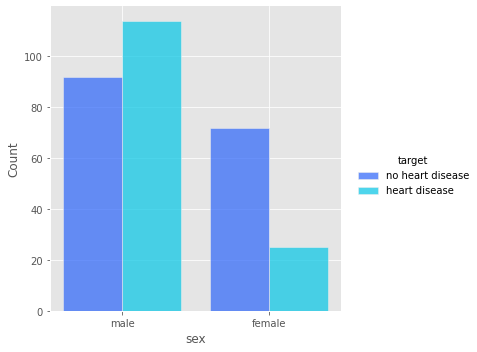

In [15]:
df = heart_disease[['target','sex']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})
df['sex'] = df['sex'].replace({1:"male", 0:"female"})
sns.displot(x='sex',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
plt.xticks(range(0,2));
#Αρχικά παρατηρούμε πως στο dataset μας υπάρχουν πιο πολλοί άντρες παρά γυναίκες. Θα ήταν ενδιαφέρον να εξετάσουμε εάν 
#υπάρχει κάποια συσχέτιση μεταξύ του φύλου και του εάν το άτομο είναι ασθενής ή όχι. Μπορούμε να δούμε πως οι άντρες που 
#πάσχουν από καρδιοπάθεια είναι περισσότεροι από αυτούς που δεν πάσχουν. Αντιθέτως, οι γυναίκες που πάσχουν από την ασθένεια 
#είναι πολύ λιγότερες σε σχέση με αυτές που δεν πάσχουν.

In [16]:
heart_disease['sex'].value_counts(normalize=True)

1    0.679868
0    0.320132
Name: sex, dtype: float64

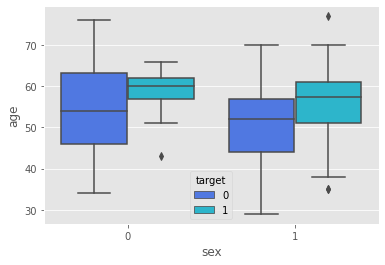

In [17]:
sns.boxplot(x='sex', y='age', hue='target', data=heart_disease);
#Εδώ βλέπουμε τη σχέση που έχουν το φύλο και η ηλικία του ατόμου με το εάν θα πάσχουν απο την ασθένεια.

## CP column

chest pain type  
          -- Value 1: typical angina  
          -- Value 2: atypical angina  
          -- Value 3: non-anginal pain  
          -- Value 4: asymptomatic  
          (categorical variable)

In [18]:
print(heart_disease['cp'].count())
print(heart_disease['cp'].unique()) #δεν έχουμε missing values

303
[1. 4. 3. 2.]


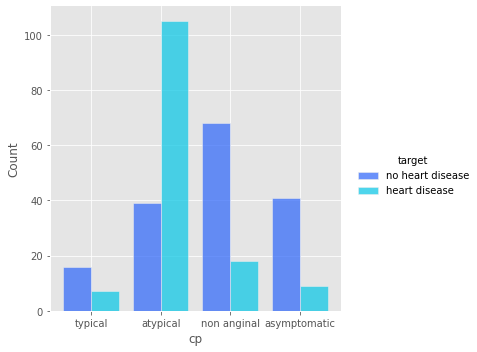

In [19]:
df = heart_disease[['target','cp']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})
df['cp'] = df['cp'].replace({1: "typical", 2: "atypical", 3: "non anginal", 4: "asymptomatic"})
sns.displot(x='cp',hue = 'target', data=df, discrete=True, shrink=.8, multiple="dodge")
plt.xticks([0,1,2,3],["typical", "atypical", "non anginal","asymptomatic"]);
#Από το παρακάτω διάγραμμα, παρατηρούμε ότι οι ασθενείς που έχουν τον πόνο στο στήθος που αντιστοιχεί στο Value 4, έχουν
#περισσότερες πιθανότητες να έχουν καρδιασθνένεια. Επιπλέον, οι ασθενείς που έχουν τον πόνο στο στήθος που αντιστοιχεί στο 
#Value 3, έχουν λιγότερες πιθανότητες να νοσούν.

## Trestbps Column

resting blood pressure (in mm Hg on admission to the hospital)  (continuous variable)

In [20]:
print(heart_disease['trestbps'].count())
print(heart_disease['trestbps'].unique()) #δεν έχουμε missing values

303
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]


In [21]:
heart_disease['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

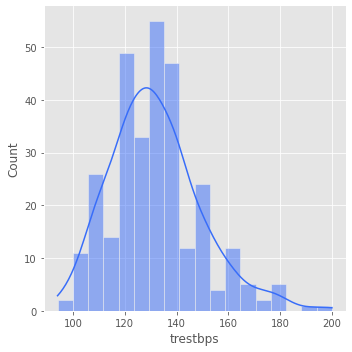

In [22]:
sns.displot(x='trestbps',data=heart_disease,kde=True);

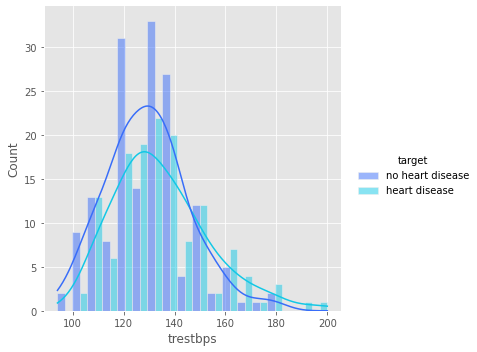

In [23]:
df = heart_disease[['target','trestbps']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})

sns.displot(x='trestbps',hue = 'target', data=df,multiple="dodge",kde=True);

## Chol Column

serum cholestoral in mg/dl  (continuous variable)

In [25]:
print(heart_disease['chol'].count())
print(heart_disease['chol'].unique()) #δεν έχουμε missing values

303
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 210. 327. 149. 295. 306. 178. 237. 218. 242.
 319. 166. 180. 311. 278. 342. 169. 187. 157. 176. 241. 131.]


In [26]:
heart_disease['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

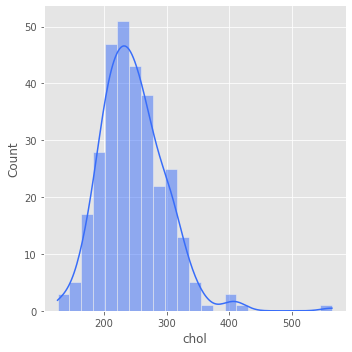

In [27]:
sns.displot(x='chol',data=heart_disease,kde=True);

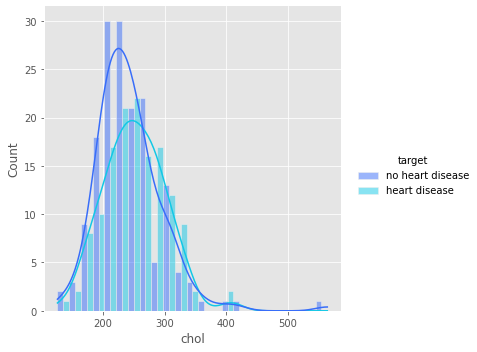

In [28]:
df = heart_disease[['target','chol']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})

sns.displot(x='chol',hue = 'target', data=df,multiple="dodge", kde=True);

## Fbs Column

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  (binary categorical variable)

In [29]:
heart_disease['fbs'] = heart_disease['fbs'].astype(int)
#αλλάζουμε το type της μεταβλητής fbs από float σε int

In [30]:
print(heart_disease['fbs'].count())
print(heart_disease['fbs'].unique()) #δεν έχουμε missing values

303
[1 0]


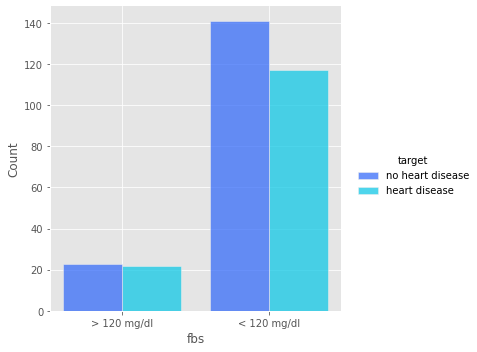

In [31]:
df = heart_disease[['target','fbs']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)
df['fbs'].replace({1:"> 120 mg/dl", 0:"< 120 mg/dl"},inplace=True)

sns.displot(x='fbs',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
#plt.xticks([0,1],["> 120 mg/dl","< 120 mg/dl"]);
#Εδώ βλέπουμε ότι, εάν η fbs είναι μικρότερη από 120, υπάρχουν παραπάνω πιθανότητες το άτομο να μη νοσεί.

## Restecg Column

In [32]:
heart_disease['restecg'] = heart_disease['restecg'].astype(int)
#αλλάζουμε το type της μεταβλητής restecg από float σε int

In [33]:
print(heart_disease['restecg'].count())
print(heart_disease['restecg'].unique()) #δεν έχουμε missing values

303
[2 0 1]


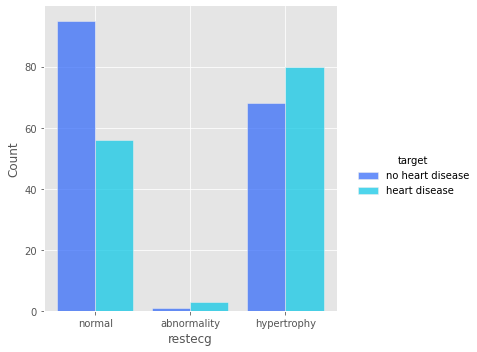

In [34]:
df = heart_disease[['target','restecg']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)
df['restecg'].replace({0: "normal", 1: "abnormality", 2: "hypertrophy"})

sns.displot(x='restecg',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
plt.xticks([0,1,2],["normal","abnormality","hypertrophy"]);
#Εδώ βλέπουμε ότι, εάν η restecg έχει value 0, τα περισσότερ ατομα δεν νοσουν, ενώ εάν έχει value 2, τα περισσότερα άτομα στο
#δείγμα νοσούν. Οι παρατηρήσεις με value 1 (abnormality) φαίνεται να είναι σπάνιες, και να μην επηρρεάζουν ιδιαίτερα την target.

## Thalach Column

maximum heart rate achieved (continuous variable)

In [35]:
print(heart_disease['thalach'].count())
print(heart_disease['thalach'].unique()) #δεν έχουμε missing values

303
[150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90.]


In [36]:
heart_disease['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

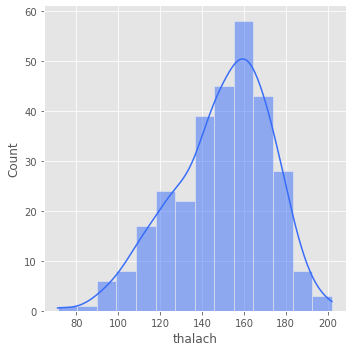

In [37]:
sns.displot(x='thalach',data=heart_disease, kde=True);

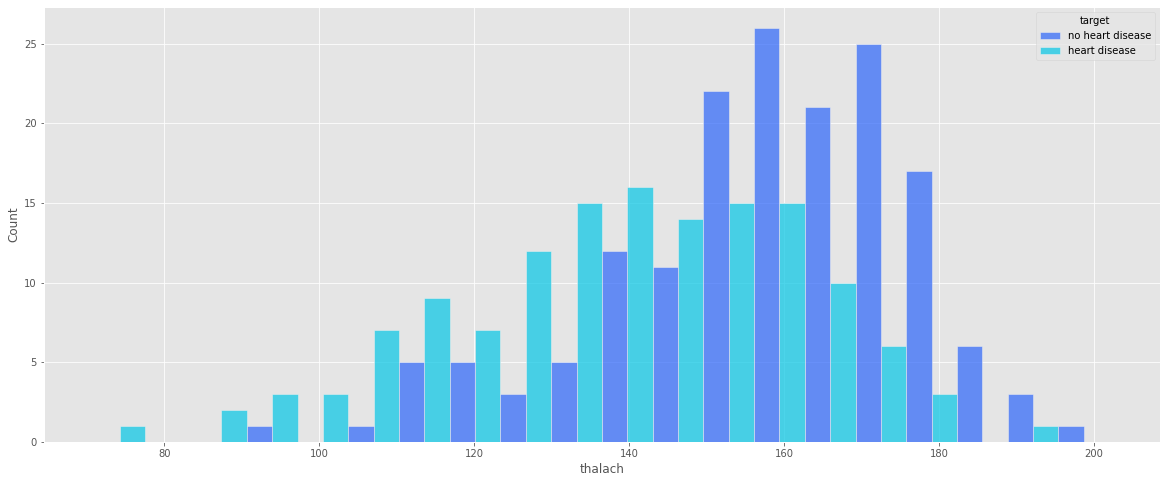

In [38]:
plt.figure(figsize=(20,8))
df = heart_disease[['target','thalach']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)

sns.histplot(x='thalach',hue='target',data=df, bins=20, multiple="dodge");
#Απ'ότι φαίνεται, οι μεγαλύτερες αυτές τιμές της thalach είναι καλό σημάδι : τα περισσότερα άτομα στο δείγμα με υψηλή thalach είναι
#υγιείς. Αντιθέτως, φαίνεται πως η χαμηλότερη thalach είναι μία ένδειξη ασθένειας.

## Exang Column

exercise induced angina (1 = yes; 0 = no)  (binary variable)

In [39]:
heart_disease['exang'] = heart_disease['exang'].astype(int)
#αλλάζουμε το type της μεταβλητής exang από float σε int

In [40]:
print(heart_disease['exang'].count())
print(heart_disease['exang'].unique()) #δεν έχουμε missing values

303
[0 1]


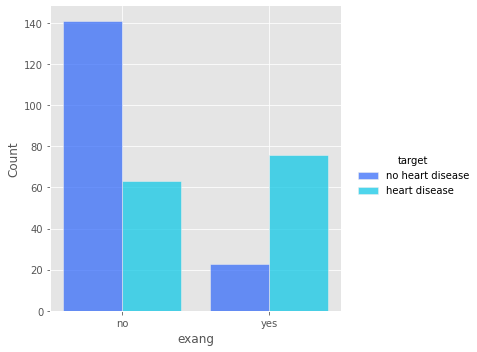

In [41]:
df = heart_disease[['target','exang']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)
df['exang'].replace({1:'yes',0:'no'})

sns.displot(x='exang',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
plt.xticks([0,1],['no','yes']);
#Εδώ βλέπουμε ότι, οι περισσότεροι ασθενείς που δε νοσούν, έχουν exang με υεσ. Αντιθέτως, τα περισσότερα άτομα με exang με value 2
#πάσχουν από την ασθένεια.

## Oldpeak Column

ST depression induced by exercise relative to rest (continuous variable)

In [42]:
print(heart_disease['oldpeak'].count())
print(heart_disease['oldpeak'].unique()) #δεν έχουμε missing values

303
[2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


In [43]:
heart_disease['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

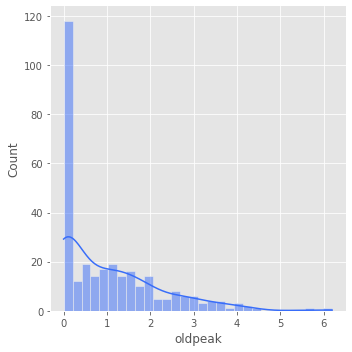

In [44]:
sns.displot(x='oldpeak',data=heart_disease, kde=True, bins=30);
#Παρατηρούμε ότι η κατάνομη είναι right-skewed, έχουμε δηλαδη ορισμένες αρκετά μεγαλύτερες τιμές της exang που δημιουργούν μία 
#δεξιά ουρά στην κατανομή της. Επίσης, φαίνεται πως τα περισσότερα άτομα έχουν oldpeak σχεδόν 0.

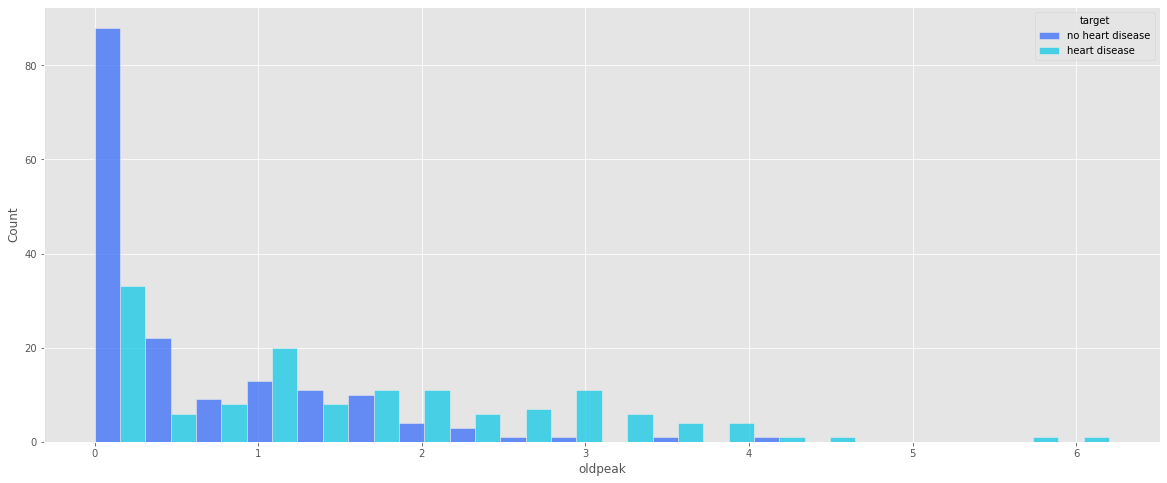

In [45]:
plt.figure(figsize=(20,8))
df = heart_disease[['target','oldpeak']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)

sns.histplot(x='oldpeak',hue='target',data=df, bins=20, multiple="dodge");
#Όπως φαίνεται στο γράφημα αυτό, τα περισσότερα άτομα που έχουν oldpeak κοντά στο 0 είναι υγιή.

## Slope Column

In [46]:
heart_disease['slope'] = heart_disease['slope'].astype(int)
#αλλάζουμε το type της μεταβλητής slope από float σε int

In [47]:
print(heart_disease['slope'].count())
print(heart_disease['slope'].unique()) #δεν έχουμε missing values

303
[3 2 1]


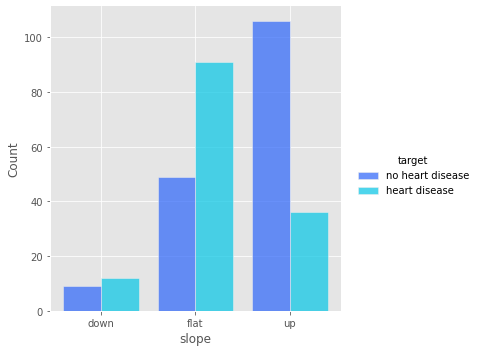

In [48]:
df = heart_disease[['target','slope']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)
df['slope'].replace({1: "up", 2: "flat", 3: "down"}, inplace=True)

sns.displot(x='slope',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
#Φαίνεται πως τα περισσότερα άτομα με upsloping slope είναι υγιή, ενώ τα περισσότερα άτομα με flat slope είναι καρδιοπαθείς. Το 
#downsloping slope δε μας δίνει κάποια ιδιαίτερη πληροφορία για την target.

## Ca Column

number of major vessels (0-3) colored by flouroscopy (categorical ordinal variable)

In [49]:
print(heart_disease['ca'].count())
print(heart_disease['ca'].unique()) 
#εδώ έχουμε missing value : '?'. Θα πρέπει να μετατρέψω τις τιμές αυτές σε τιμές τύπου None, για να μπορέσω έπειτα να τις αντικαταστήσω
#με κάποιο άλλο value που προκύπτει από τη στήλη ca

303
['0.0' '3.0' '2.0' '1.0' '?']


In [50]:
heart_disease['ca'].replace('?', np.nan, inplace=True)

In [51]:
imputer = SimpleImputer(strategy= 'most_frequent')

heart_disease['ca'] = imputer.fit_transform(heart_disease[['ca']])

In [52]:
heart_disease['ca'].isnull().sum()

0

In [53]:
heart_disease['ca'] = heart_disease['ca'].astype(float).astype(int)

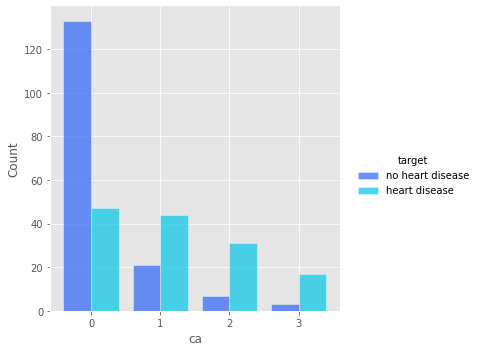

In [54]:
df = heart_disease[['target','ca']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)

sns.displot(x='ca',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
plt.xticks(range(0,4));
#Βλέπουμε ότι τα περισσότερα άτομα που δεν έχουν κανένα colored vessel είναι υγιή. Αντιθέτως, τα άτομα που έχουν έστω 1 coloured vessel
#είναι κατά κύριο λόγο καρδιοπαθείς.

## Thal Column 

3 = normal; 6 = fixed defect; 7 = reversable defect  (categorical variable)

In [55]:
print(heart_disease['thal'].count())
print(heart_disease['thal'].unique()) 
#εδώ έχουμε missing value : '?'. Θα πρέπει να μετατρέψω τις τιμές αυτές σε τιμές τύπου None, για να μπορέσω έπειτα να τις αντικαταστήσω
#με κάποιο άλλο value που προκύπτει από τη στήλη thal

303
['6.0' '3.0' '7.0' '?']


In [56]:
heart_disease['thal'].replace('?', np.nan, inplace=True)

In [57]:
imputer = SimpleImputer(strategy= 'most_frequent')
heart_disease['thal'] = imputer.fit_transform(heart_disease[['thal']])

In [58]:
heart_disease['thal'].isnull().sum()

0

In [59]:
heart_disease['thal'] = heart_disease['thal'].astype(float).astype(int)

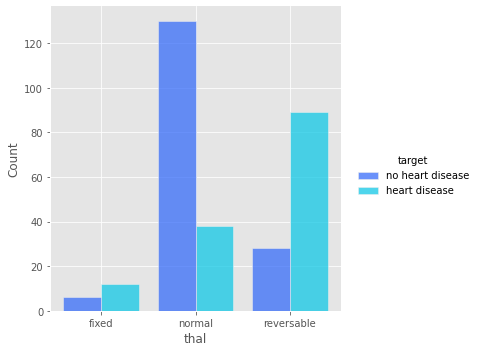

In [60]:
df = heart_disease[['target','thal']].copy()
df['target'].replace({0:'no heart disease',1:'heart disease'},inplace=True)
df['thal'].replace({3: "normal", 6: "fixed", 7: "reversable"}, inplace=True)

sns.displot(x='thal',hue ='target',data=df, discrete=True, shrink=.8, multiple="dodge");
#plt.xticks(range(0,9));
#Βλέπουμε ότι τα περισσότερα άτομα που έχουν value 3 είναι υγιή. Αντιθέτως, τα άτομα που έχουν value 7
#είναι κατά κύριο λόγο καρδιοπαθείς. Η value 6 δε φαίνεται να επηρρεάζει ιδιαίτερα την target.

## General EDA

In [61]:
print(heart_disease.dtypes)
heart_disease.head()

age         float64
sex           int32
cp          float64
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalach     float64
exang         int32
oldpeak     float64
slope         int32
ca            int32
thal          int32
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1.0,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4.0,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4.0,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3.0,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2.0,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


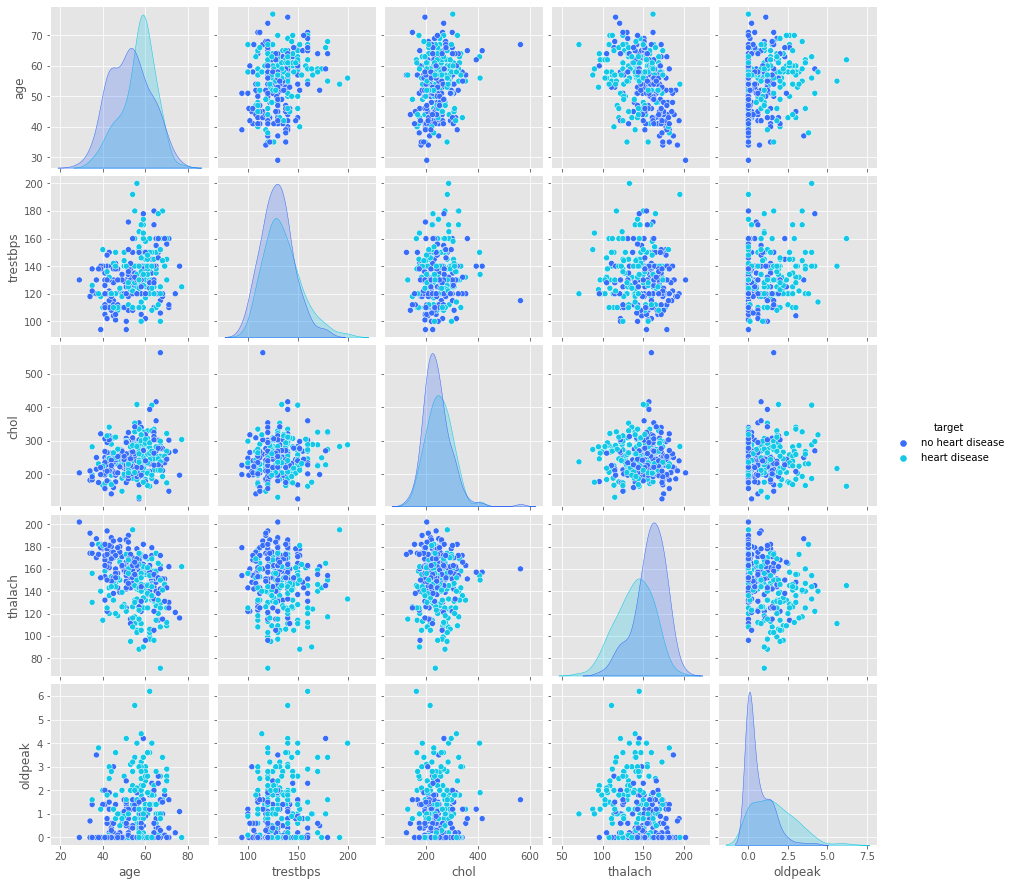

In [63]:
#Σχέση μεταξύ όλων των συνεχών μεταβλητών με scatterplots
df = heart_disease[['age','trestbps','chol','thalach','oldpeak','target']].copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})

sns.pairplot(data = df, vars = df.drop('target',axis=1).columns,  hue = 'target');

<AxesSubplot:>

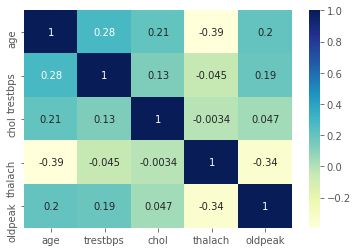

In [64]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [65]:
#Μία μεταβλητή που θα μπορούσαμε να χωρίσουμε σε bins είναι η ηλικία, καθώς όπως είδαμε παραπάνω, οι καρδιοπαθείς τείνουν να είναι
#μεγαλύτερησ ηλικίας. Συνεπώς, αν κάναμε διακριτοποίηση στις μικρότερες και μεγαλύτερες ηλικίες, θα φαινόνοτυσαν πιο καθαρά τα
#αποτελέσματα στις μεγαλύτερες ηλικίες. Διαλέγω το q με βάση το διάγραμμα της κατανομής του age σε σχέση με το target.

bin_labels = []
q = [0, 40, 50, 60, 70, 100]

heart_disease['Age_bins'] = pd.cut(heart_disease['age'], q)

for i in range(1,len(q)):
    bin_labels.append('bin_' + str(i))
    
heart_disease['Age_bins_' + str(len(bin_labels))] = pd.cut(heart_disease['age'], bins = q ,labels=bin_labels)

print(heart_disease.groupby('Age_bins').size())
heart_disease.head()

Age_bins
(0, 40]       18
(40, 50]      76
(50, 60]     130
(60, 70]      73
(70, 100]      6
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_bins,Age_bins_5
0,63.0,1,1.0,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0,"(60, 70]",bin_4
1,67.0,1,4.0,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1,"(60, 70]",bin_4
2,67.0,1,4.0,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1,"(60, 70]",bin_4
3,37.0,1,3.0,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0,"(0, 40]",bin_1
4,41.0,0,2.0,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0,"(40, 50]",bin_2


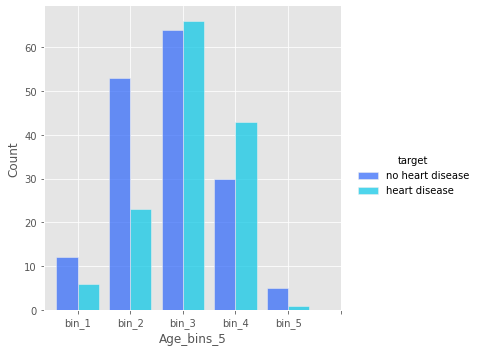

In [66]:
df = heart_disease.copy()
df['target'] = df['target'].replace({0:'no heart disease',1:'heart disease'})
sns.displot(x= 'Age_bins_5', hue= 'target', data= df, discrete=True, shrink=.8, multiple="dodge");
plt.xticks(range(0,6));